# Logistic Regression for Iris dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('iris.csv')

In [3]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## Plotting each feature's distribution

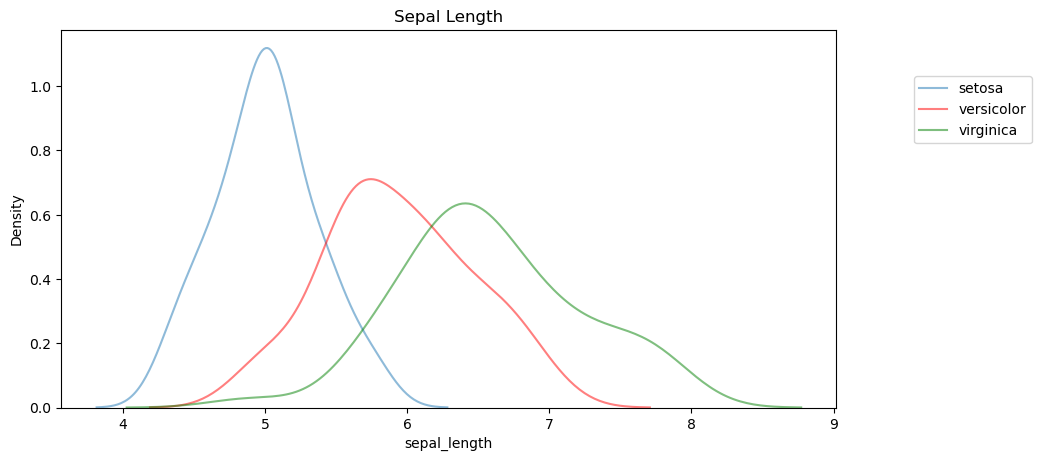

In [16]:
plt.figure(figsize=(10,5),dpi=100)
plt.title('Sepal Length')
sns.kdeplot(data=df[df['species'] == 'setosa'],x='sepal_length',label='setosa',alpha=0.5)
sns.kdeplot(data=df[df['species'] == 'versicolor'],x='sepal_length',color='r',label='versicolor',alpha=0.5)
sns.kdeplot(data=df[df['species'] == 'virginica'],x='sepal_length',color='g',label='virginica',alpha=0.5)
plt.legend(loc=(1.1,0.7))

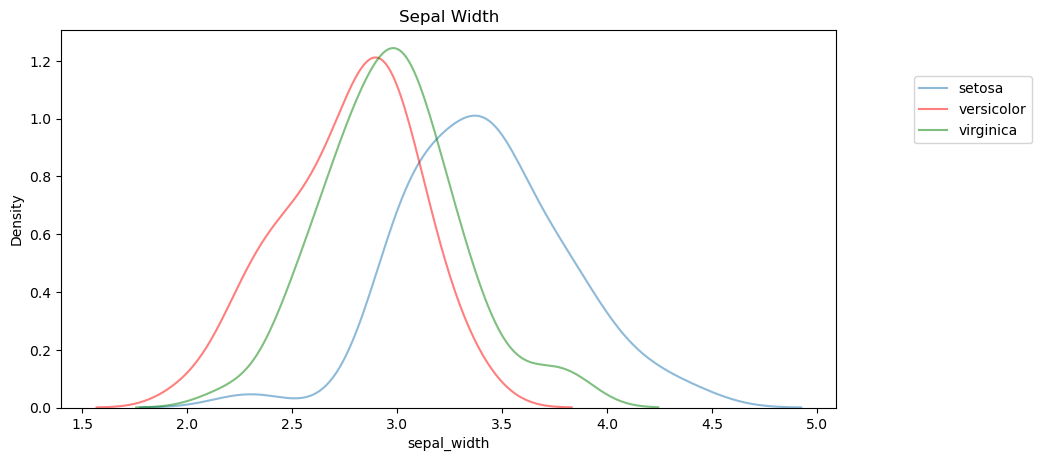

In [18]:
plt.figure(figsize=(10,5),dpi=100)
plt.title('Sepal Width')
sns.kdeplot(data=df[df['species'] == 'setosa'],x='sepal_width',label='setosa',alpha=0.5)
sns.kdeplot(data=df[df['species'] == 'versicolor'],x='sepal_width',color='r',label='versicolor',alpha=0.5)
sns.kdeplot(data=df[df['species'] == 'virginica'],x='sepal_width',color='g',label='virginica',alpha=0.5)
plt.legend(loc=(1.1,0.7))

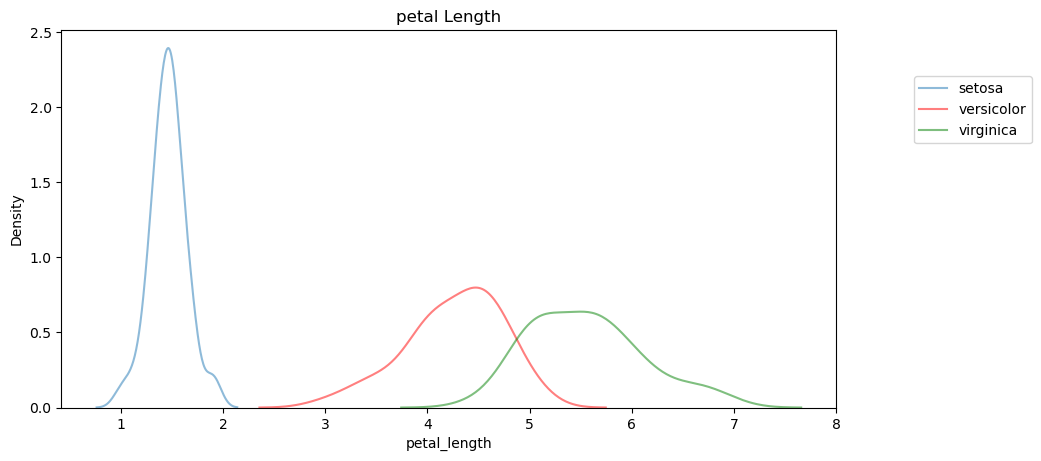

In [19]:
plt.figure(figsize=(10,5),dpi=100)
plt.title('petal Length')
sns.kdeplot(data=df[df['species'] == 'setosa'],x='petal_length',label='setosa',alpha=0.5)
sns.kdeplot(data=df[df['species'] == 'versicolor'],x='petal_length',color='r',label='versicolor',alpha=0.5)
sns.kdeplot(data=df[df['species'] == 'virginica'],x='petal_length',color='g',label='virginica',alpha=0.5)
plt.legend(loc=(1.1,0.7))

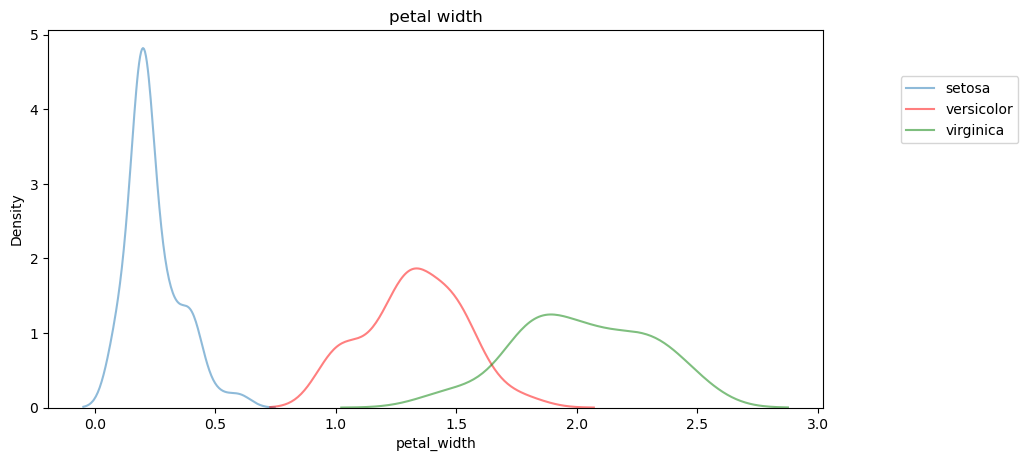

In [20]:
plt.figure(figsize=(10,5),dpi=100)
plt.title('petal width')
sns.kdeplot(data=df[df['species'] == 'setosa'],x='petal_width',label='setosa',alpha=0.5)
sns.kdeplot(data=df[df['species'] == 'versicolor'],x='petal_width',color='r',label='versicolor',alpha=0.5)
sns.kdeplot(data=df[df['species'] == 'virginica'],x='petal_width',color='g',label='virginica',alpha=0.5)
plt.legend(loc=(1.1,0.7))

### As you can see above, only by using petal information, we can seperate 'setosa' from other classes

In [33]:
X = df.drop('species',axis=1)
Y = df['species']

In [34]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [35]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X,Y,test_size=0.3)

In [43]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(penalty='l1',tol=0.001,solver='saga',max_iter=1000)
model.fit(xtrain,ytrain)

LogisticRegression(max_iter=1000, penalty='l1', solver='saga', tol=0.001)

In [32]:
preds = model.predict(xtest)
ytest = pd.DataFrame(ytest)
ytest['predicted'] = preds
ytest

,species,predicted
43,setosa,setosa
146,virginica,virginica
31,setosa,setosa
14,setosa,setosa
105,virginica,virginica
140,virginica,virginica
120,virginica,virginica
22,setosa,setosa
134,virginica,virginica
100,virginica,virginica


In [44]:
from sklearn.metrics import confusion_matrix
preds = model.predict(xtest)
confusion_matrix(ytest,preds)

array([[17,  0,  0],
       [ 0, 12,  2],
       [ 0,  0, 14]], dtype=int64)

In [45]:
from sklearn.metrics import classification_report
print(classification_report(ytest,preds))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        17
  versicolor       1.00      0.86      0.92        14
   virginica       0.88      1.00      0.93        14

    accuracy                           0.96        45
   macro avg       0.96      0.95      0.95        45
weighted avg       0.96      0.96      0.96        45

